# Classificator with all dummy data augmentation technqiues (including combinations)

In [1]:
from lib import Augmentation_methods
from lib import data_preparation

import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.regularizers import l2
from IPython.display import clear_output

2022-12-13 02:26:55.390481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
BASEDIR = Path("/store/projects/fallki/")
FAKEDIR = BASEDIR / "Fake-Events" / "2. Fake-Events Messung"

# BASEDIR = pathlib.Path('/store/projects/fallki/')
# FAKEDIR = pathlib.Path('Fake-Events/2. Fake-Events Messung/')
df_fake = pd.read_parquet(BASEDIR / FAKEDIR / 'gSensoren_FakeEvents.parquet')

### Dummy Data

In [3]:
dummy_lab_data = data_preparation.fake_lab_data()


/home/ing2146/Final/SNEHA/lib/data_preparation.py:202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  All_Events_Data = np.array(All_Events_Data)[shuffler]
/home/ing2146/Final/SNEHA/lib/data_preparation.py:226: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df_fake_dummy_Data = np.array(df_fake_dummy_Data)


In [4]:
dummy_lab_data[0]

array([array([1028., 1030., 1028., ..., 1032., 1030., 1028.]),
       array([1038., 1040., 1040., ..., 1034., 1040., 1036.]),
       array([1038., 1040., 1042., ..., 1038., 1034., 1040.]),
       array([1039., 1039., 1037., ..., 1041., 1041., 1041.]),
       array([1030., 1030., 1032., ..., 1030., 1030., 1030.]),
       array([1039., 1041., 1039., ..., 1039., 1043., 1043.]),
       array([1035., 1037., 1039., ..., 1037., 1041., 1043.]),
       array([1040., 1038., 1036., ..., 1036., 1040., 1036.]),
       array([1026., 1030., 1028., ..., 1026., 1028., 1028.]),
       array([1039., 1038., 1039., ..., 1041., 1043., 1041.]),
       array([1035., 1040., 1038., ..., 1036., 1036., 1038.]),
       array([1028., 1026., 1030., ..., 1030., 1028., 1028.]),
       array([1028., 1026., 1026., ..., 1026., 1026., 1026.]),
       array([1037., 1036., 1035., ..., 1040., 1039., 1037.]),
       array([1040., 1036., 1036., ..., 1040., 1038., 1040.]),
       array([1035., 1039., 1039., ..., 1041., 1039., 1

### Augmented data preparation from different DA techniques

In [5]:
augmented_dummy = []

for i, event in enumerate(dummy_lab_data[0]): 
    
    #Jittering
    Noise_dummy = Augmentation_methods.add_white_noise(event, 0.15) 
    augmented_dummy.append(Noise_dummy)
    
    #Magnitude Warping
    magnitude_warped_dummy =  Augmentation_methods.magnitudewarping(event,0.1, 20) 
    augmented_dummy.append(magnitude_warped_dummy[1])
    
    #Time Warping
    Time_warped_dummy = Augmentation_methods.DA_TimeWarp(event, 0.3, 4) 
    augmented_dummy.append(Time_warped_dummy[2])
    
    #Window Warping
    window_warped_dummy = Augmentation_methods.windowWarp(event, window_ratio=0.1, scales=[0.5, 2.]) 
    augmented_dummy.append(window_warped_dummy)
    
    #Permutation
    permutated_dummy = Augmentation_methods.Permutation(event, nPerm=4, minSegLength=10) 
    augmented_dummy.append(permutated_dummy[1])
    
    #Jittering + Magnitude warping
    curve_JMW, jittered_magnitude_warped_dummy  =  Augmentation_methods.magnitudewarping((Augmentation_methods.add_white_noise(event, 0.50)),0.1, 10)
    augmented_dummy.append(jittered_magnitude_warped_dummy)
    
    #Jittering + Time warping
    jittered_time_curve,Jittered_Time_warped_dummy, Jittered_Time_warped_dummy_stft = Augmentation_methods.DA_TimeWarp((Augmentation_methods.add_white_noise(event, 0.50)), 0.3, 4)
    augmented_dummy.append(Jittered_Time_warped_dummy_stft)
    
    #Jittering + window warping
    Jittered_window_warped_dummy = Augmentation_methods.windowWarp((Augmentation_methods.add_white_noise(event, 0.50)), window_ratio=0.1, scales=[0.5, 2.])
    augmented_dummy.append(Jittered_window_warped_dummy)
    
    #magnitude warping + window warping
    mag_warped  =  Augmentation_methods.magnitudewarping(event,0.1, 10)
    mag_window_warped_dummy = Augmentation_methods.windowWarp(mag_warped[1] , window_ratio=0.1, scales=[0.5, 2.])
    augmented_dummy.append(mag_window_warped_dummy)
    
    #Time warping + window warping
    t_warped = Augmentation_methods.DA_TimeWarp(event, 0.3, 4)
    time_window_warped_dummy = Augmentation_methods.windowWarp(t_warped[2] , window_ratio=0.1, scales=[0.5, 2.])
    augmented_dummy.append(time_window_warped_dummy)
    
    
    
    
augmented_dummy_array = np.array(augmented_dummy)    

/tmp/ipykernel_1847989/1361715336.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  augmented_dummy_array = np.array(augmented_dummy)


In [6]:
augmented_dummy_array_df =pd.DataFrame(augmented_dummy_array,columns=['z'])

In [7]:
augmented_dummy_array_df

,z
0,"[1022.6378652095445, 1032.3648889226197, 1030...."
1,"[1062.8514969522757, 1064.4565177640638, 1061...."
2,"[1028.0, 1029.8677830747301, 1029.728315000741..."
3,"[1028.0, 1029.7999875459243, 1028.400024908151..."
4,"[1028.0, 1030.0, 1028.0, 1030.0, 1030.0, 1028...."
...,...
715,"[956.2701698758898, 941.1308758323677, 953.990..."
716,"[1041.797297897999, 1041.797297897999, 1040.90..."
717,"[1052.4950849192267, 1050.6562332469832, 1044...."
718,"[1237.6808360153868, 1239.1068110546225, 1234...."


## Data Preparation  

In [8]:
def SignalToSpectrum(signal, samplerate=1600):
    SIGNAL_LENGTH = samplerate * 10
    F = stft(signal[:SIGNAL_LENGTH], 1600, nperseg=128)[2]
    F = F[2:,]
    return np.expand_dims(np.abs(F), axis=2) # Add extra dimension for TF Conv2D

### Augmented dummy data 

In [9]:
M = []
for i in range(len(augmented_dummy_array_df)):
    M.append({"event": "Dummy" ,
              "istSturz": 1,
              "signalLenght": len(augmented_dummy_array_df.z[i]),
              "spectrum": SignalToSpectrum(augmented_dummy_array_df.z[i])})
augmented_df = pd.DataFrame.from_dict(M)

### Fake events data

In [10]:
L = []
for (teensy, event, run, rep), ss in df_fake.groupby(["teensy", "experiment", "run", "rep"]):
    L.append({"event": event,
              "run": run,
              "istSturz": int(event == "Dummy"),
              "signalLenght": len(ss["z"]),
              "spectrum": SignalToSpectrum(ss["z"])})
df = pd.DataFrame.from_dict(L)
df.drop('run', inplace=True, axis=1)

In [11]:
df_fake

,teensy,experiment,run,rep,t,x,y,z
0,2,1.5L Flasche,L1,1,0.000000,14.0,1.0,1040.0
1,2,1.5L Flasche,L1,1,0.000623,12.0,4.0,1041.0
2,2,1.5L Flasche,L1,1,0.001247,10.0,-1.0,1038.0
3,2,1.5L Flasche,L1,1,0.001870,10.0,-1.0,1036.0
4,2,1.5L Flasche,L1,1,0.002493,9.0,-6.0,1036.0
...,...,...,...,...,...,...,...,...
15988,1,1.5L Flasche,L8,1,10.010239,3.0,24.0,1039.0
15989,1,1.5L Flasche,L8,1,10.010865,2.0,24.0,1039.0
15990,1,1.5L Flasche,L8,1,10.011491,2.0,25.0,1039.0
15991,1,1.5L Flasche,L8,1,10.012117,5.0,22.0,1037.0


### Combine the augmented and fake data df

In [12]:
final_df = []
final_df = df.append(augmented_df)

/tmp/ipykernel_1847989/2856507006.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = df.append(augmented_df)


In [13]:
#shuffle the final dataframe
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [14]:
final_df

,event,istSturz,signalLenght,spectrum
0,Getränkeflasche,0,15999,"[[[218.32593606440386], [0.11140682938919734],..."
1,Dummy,1,16069,"[[[269.3199225740077], [0.34432511074448213], ..."
2,2 Bücher,0,16060,"[[[218.44143595139977], [0.22753907648533028],..."
3,Getränkeflasche,0,16049,"[[[218.32162138438062], [0.1508768801184862], ..."
4,Dummy,1,15968,"[[[220.25077239773285], [0.4342962664376527], ..."
...,...,...,...,...
1794,Pflegeartikel,0,15965,"[[[220.47838869396017], [0.19052429449723415],..."
1795,Dummy,1,16066,"[[[218.47629161994428], [0.06429553709989536],..."
1796,Dummy,1,16022,"[[[193.5348876151227], [0.41308366602470215], ..."
1797,Dummy,1,15987,"[[[219.7624155195631], [2.815700594781327], [2..."


In [15]:
# normalize the spectrum to facilitate training
final_df["normalizedSpectrum"] = final_df["spectrum"] / final_df["spectrum"].map(np.max).max()

## Model

In [16]:
# initialize a sequential network model https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
mdl = Sequential()
# as a first layer add a convolutional layer https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# the input shape is our image size 63x251 px the additional,1 is the channel feature we do not need and therefore leave at 1
# the Integer 8 here is the dimensionality of the output space (i.e. the number of output filters in the convolution).
# (63, 5) specifies the kernel size. the first dimension gives the entire length of the images rows, we chose this because we want 
# to have information about all the different frequencies at the same time, the 5 can be varied but specifies how long the time interval is
# which is brought into context with one another
mdl.add(Conv2D(8, (63, 5), activation="relu", input_shape=(63, 251, 1)))
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D The pooling layer just keeps the max value px in a (1, 4) window
mdl.add(MaxPooling2D((1, 4)))
# removes the 2 dimensionality of the data -> just a vector now https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
mdl.add(Flatten())
# this is just your usual dense connected layer of a NN https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense, the 1 specifies the 
# number of output parameters we want, which is just 1
mdl.add(Dense(1,activation="sigmoid"))
# configures the model for training https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
mdl.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# this just prints the model summery below
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 247, 8)         2528      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 61, 8)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 488)               0         
                                                                 
 dense (Dense)               (None, 1)                 489       
                                                                 
Total params: 3,017
Trainable params: 3,017
Non-trainable params: 0
_________________________________________________________________


2022-12-13 02:27:55.676056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
X = np.stack(final_df["normalizedSpectrum"].to_list())
y = final_df["istSturz"].to_numpy()

# split data in train and test set
train, test = train_test_split(range(len(y)), test_size=0.2,stratify= y)
# how many of the respective events are contained in the test set
final_df["event"][test].value_counts()

Dummy                  158
Handy                   21
1.5L Flasche            19
Springen                16
Möbel verrücken         15
Wasserkasten            15
Koffer                  15
Pflegeartikel           14
Getränkeflasche         14
2 Bücher                13
Schlüsselbund           13
Krücken                 13
Hantel                  13
Stuhl kippt             13
Tablett mit Besteck      8
Name: event, dtype: int64

### To plot accuracy and loss curve after each epoch

In [18]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):   
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

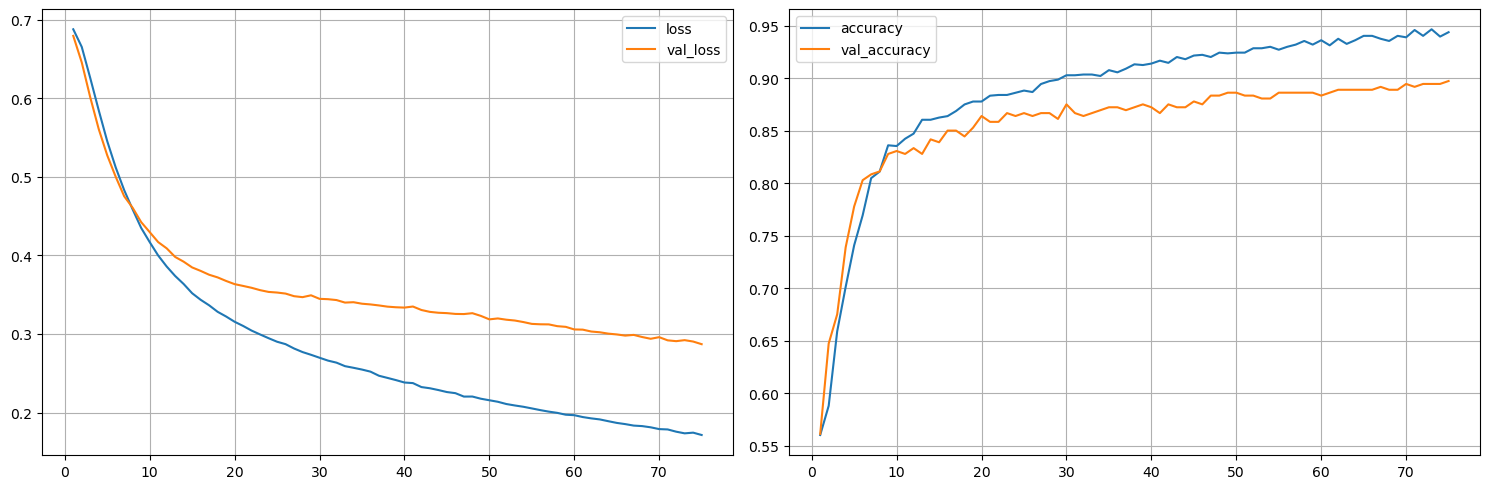

45/45 [==============================] - 1s 19ms/step - loss: 0.1714 - accuracy: 0.9437 - val_loss: 0.2870 - val_accuracy: 0.8972


In [19]:
# actual training..
callbacks_list = [PlotLearning()]
history = mdl.fit(X[train, ], y[train], epochs=75, validation_data=(X[test,], y[test]),callbacks=callbacks_list)

In [20]:
final_df.istSturz.sum()

792

### Prediction of each event

In [50]:
ypred = mdl.predict(X).ravel()
threshold =  0.10
pd.crosstab(final_df['event'], ypred >= threshold)

57/57 [==============================] - 0s 3ms/step


col_0,False,True
event,,
1.5L Flasche,16,56
2 Bücher,47,25
Dummy,9,783
Getränkeflasche,61,11
Handy,65,7
Hantel,71,0
Koffer,24,48
Krücken,72,0
Möbel verrücken,28,44


- The overfitting has significantly reduced.

### Finding the optimal threshold value

###### https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
###### https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [52]:
ypred #probability of class 1

array([0.02814626, 0.96788806, 0.15101229, ..., 0.9979864 , 1.        ,
       0.9983207 ], dtype=float32)

#### ROC CURVE

In [53]:
fpr, tpr, thresholds = roc_curve(y, ypred) #False, true positive rates and threshold

- True positive rate describes how good the model is at predicting the positive class when the actual outcome is positive and is referred as sensitivity
- False positivte rate summarizes how often a positive class is predicted when the actual outcome is negative.

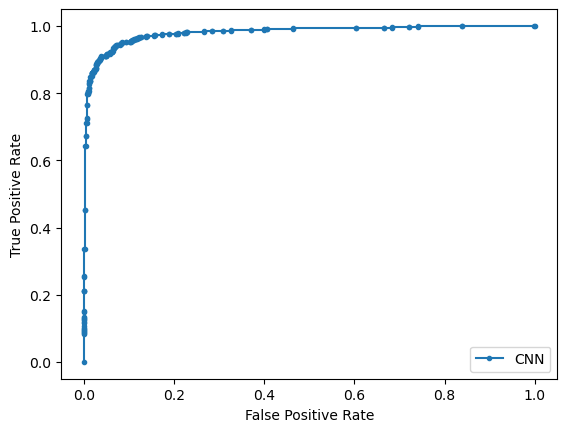

In [54]:
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='CNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

- Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
- Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

In [55]:
# calculate AUC
auc = roc_auc_score(y, ypred)
print('AUC: %.3f' % auc)

AUC: 0.980


- The higher the area under the ROC curve, the better the classifier.

###### https://mmuratarat.github.io/2019-10-01/how-to-compute-AUC-plot-ROC-by-hand

- To locate the threshold with the optimal balance between false positive and true positive rates we calculate geometric mean
- Sensitivity = TruePositive / (TruePositive + FalseNegative)
- Sensitivity = True Positive Rate
- Specificity = 1 – False Positive Rate

In [57]:
# calculate the g-mean for each threshold
#G-Mean = sqrt(Sensitivity * Specificity)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.385097, G-Mean=0.936


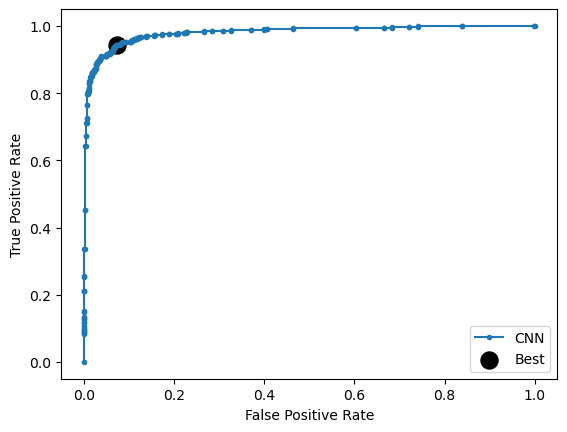

In [58]:
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='CNN')
pyplot.scatter(fpr[ix], tpr[ix],s=150, marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### PRECISION RECALL CURVE

In [59]:
precision, recall, thresholds = precision_recall_curve(y, ypred)

In [60]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.485981, F-Score=0.929


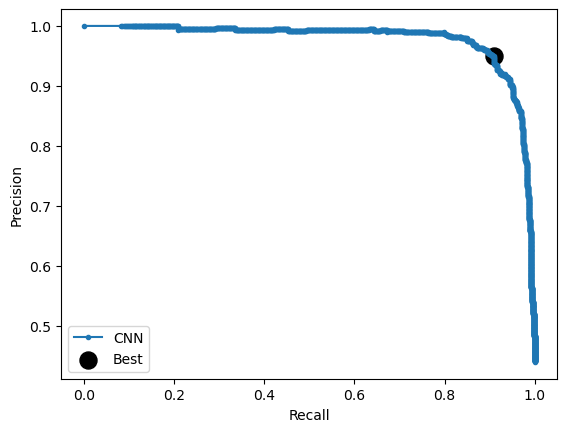

In [61]:
pyplot.plot(recall, precision, marker='.', label='CNN')
pyplot.scatter(recall[ix], precision[ix],s=150, marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

## Prediction using new optimal threshold value

In [62]:
ypred_new = mdl.predict(X).ravel()
threshold =  0.385097
pd.crosstab(final_df['event'], ypred_new >= threshold)

57/57 [==============================] - 0s 3ms/step


col_0,False,True
event,,
1.5L Flasche,57,15
2 Bücher,69,3
Dummy,44,748
Getränkeflasche,72,0
Handy,72,0
Hantel,71,0
Koffer,72,0
Krücken,72,0
Möbel verrücken,57,15


In [74]:
y_predictions = (mdl.predict(X) > 0.385097).astype("int32")
y_predictions= y_predictions.ravel()

57/57 [==============================] - 0s 3ms/step


In [75]:
y_predictions

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

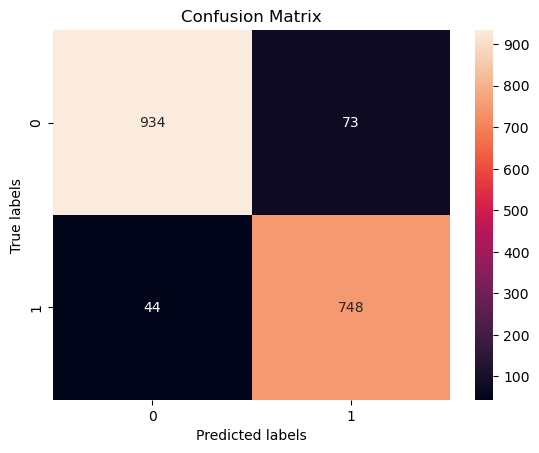

In [78]:
cm = confusion_matrix(y,y_predictions)
ax= pyplot.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
pyplot.show()      


# print("Classification report: ")

# print(classification_report(y,y_predictions))